## **1. Importing the dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

## **2. Data Loading and Understanding**

In [2]:
data = pd.read_csv('train.csv')
print(data.shape)

(800, 22)


In [8]:
pd.set_option('display.max_columns',None)
data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [9]:
# convert age column datatype to integer
data['age'] = data['age'].astype(int)

In [15]:
numerical_features = ['ID','age','result']
for col in data.columns:
    if col not in numerical_features:
        print(col," ",data[col].unique())
        print("-"*30)

A1_Score   [1 0]
------------------------------
A2_Score   [0 1]
------------------------------
A3_Score   [1 0]
------------------------------
A4_Score   [0 1]
------------------------------
A5_Score   [1 0]
------------------------------
A6_Score   [0 1]
------------------------------
A7_Score   [1 0]
------------------------------
A8_Score   [0 1]
------------------------------
A9_Score   [1 0]
------------------------------
A10_Score   [1 0]
------------------------------
gender   ['f' 'm']
------------------------------
ethnicity   ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
------------------------------
jaundice   ['no' 'yes']
------------------------------
austim   ['no' 'yes']
------------------------------
contry_of_res   ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Ir

In [16]:
data = data.drop(columns=['ID','age_desc'])

In [17]:
data.shape

(800, 20)

In [19]:
print(data['contry_of_res'].unique())

['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Argentina' 'Japan' 'Mexico' 'Nicaragua' 'Sierra Leone'
 'Czech Republic' 'Niger' 'Romania' 'Cyprus' 'Belgium' 'Burundi'
 'Bangladesh']


In [25]:
mapping = {
    'Viet Nam':'Vietnam',
    'AmericanSamoa':'United States',
    'Hong Kong':'China'
}
data['contry_of_res'] = data['contry_of_res'].replace(mapping);

# Insights
## 1. missing values in ethnicity and relation
## 2. age_desc column has only 1 unique value so it is removed
## 3. fixed contry names
## 4. Identified class imbalance in target column

# **3. Exploratory Data Analysis**

In [29]:
print(data.columns)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')


In [30]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


Age mean is 27.96375
Age median is 24.0


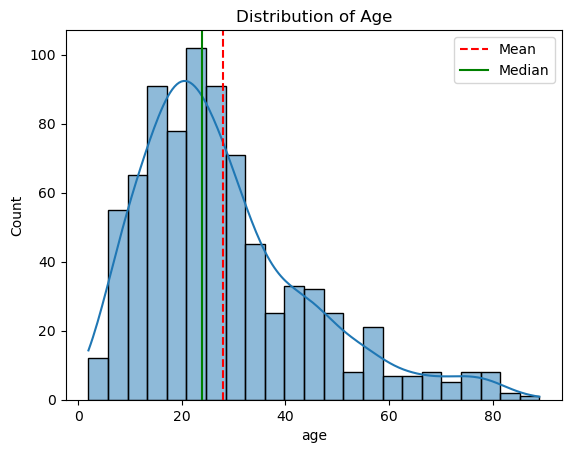

In [37]:
sns.histplot(data=data, x = 'age',kde=True)
plt.title('Distribution of Age')
age_mean = data['age'].mean()
age_median = data['age'].median()
print(f'Age mean is {age_mean}')
print(f'Age median is {age_median}')
plt.axvline(age_mean, color='red',linestyle="--",label="Mean")
plt.axvline(age_median, color='green',linestyle="-",label="Median")
plt.legend()
plt.show()

Result mean is 8.537303106501248
Result median is 9.605299308


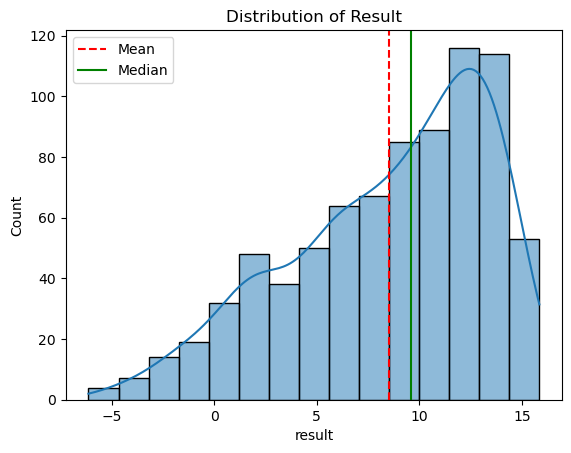

In [39]:
sns.histplot(data=data, x = 'result',kde=True)
plt.title('Distribution of Result')
result_mean = data['result'].mean()
result_median = data['result'].median()
print(f'Result mean is {result_mean}')
print(f'Result median is {result_median}')
plt.axvline(result_mean, color='red',linestyle="--",label="Mean")
plt.axvline(result_median, color='green',linestyle="-",label="Median")
plt.legend()
plt.show()

In [44]:
#Handle missing value in ethinicity and relations
data['ethnicity'] = data['ethnicity'].replace({"?":"Others","others":"Others"})
data['relation'] = data['relation'].replace({"?":"Others","Relative":"Others","Parent":"Others","Health care professional":"Others"})

In [45]:
print(data['ethnicity'].unique())
print(data['relation'].unique())

['Others' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Hispanic'
 'Asian' 'Turkish' 'South Asian' 'Latino']
['Self' 'Others']


# **4. Label Encoding**

In [48]:
object_columns = data.select_dtypes(include=['object']).columns
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [51]:
#Saving the label encoders for each columns for future testing purpose
encoders = {}
for column in object_columns:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])
    encoders[column] = label_encoder

with open('encoders.pkl','wb') as f:
    pickle.dump(encoders,f)

In [52]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [53]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


In [55]:
corr = data.corr()

<Axes: >

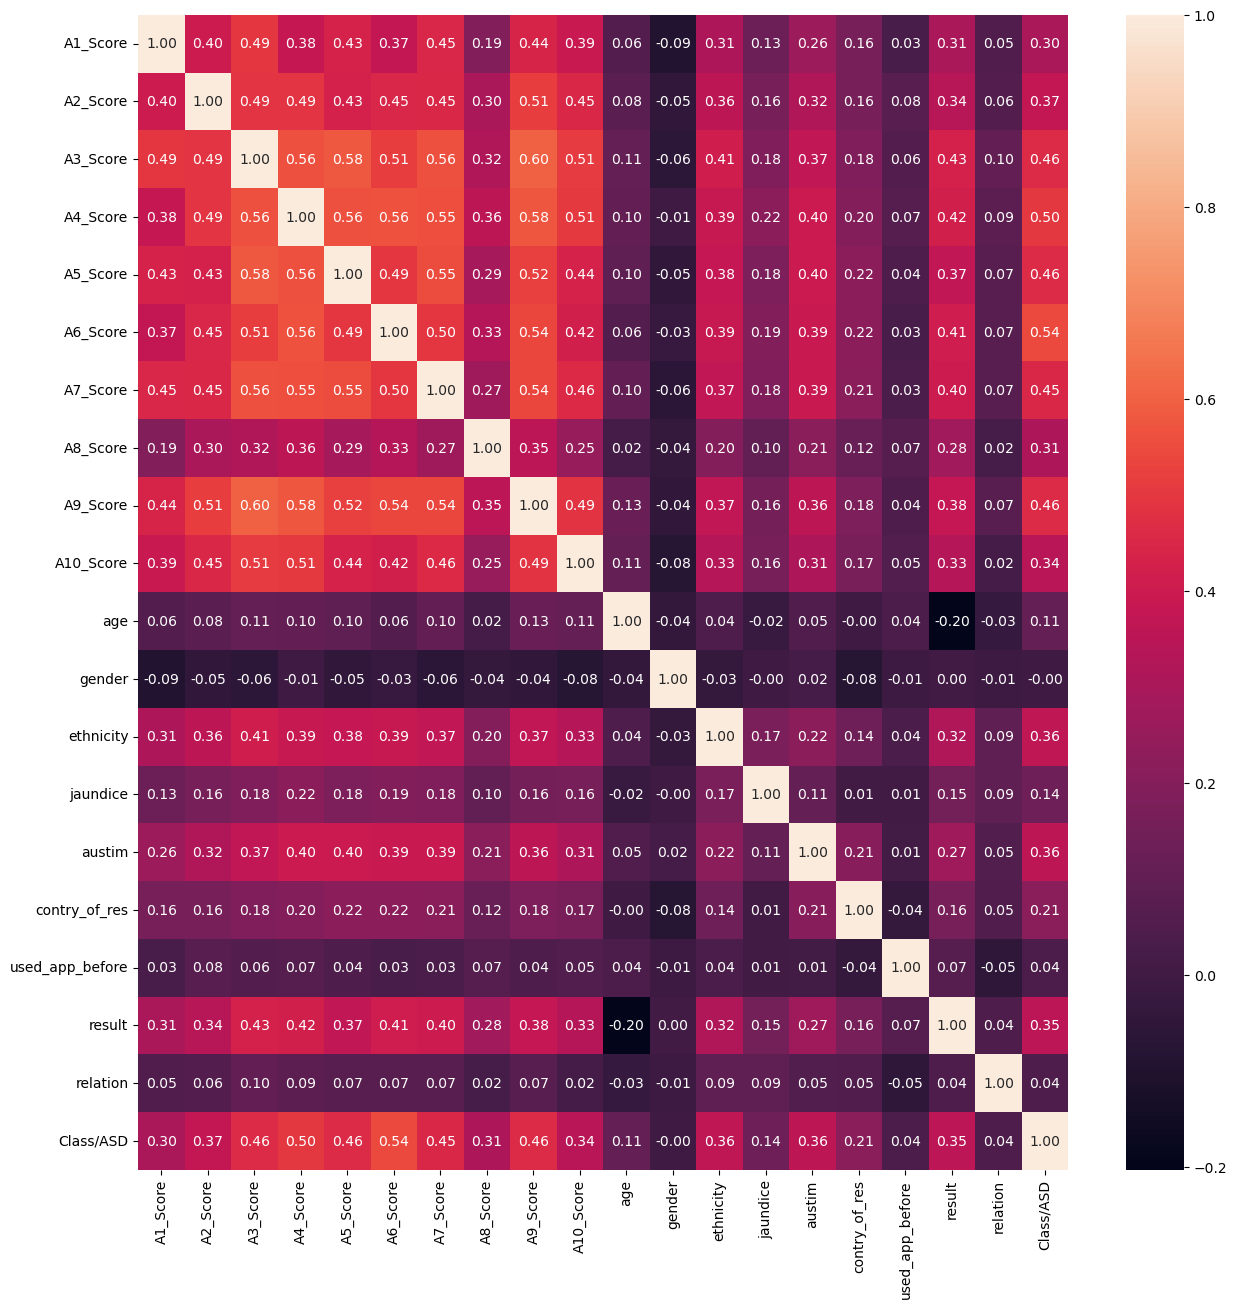

In [60]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True,annot_kws={'size':10},cbar='coolwarm',fmt='.2f')
# We dont have any highly coorelated column as no need to drop any column

## **4. Data Preprocessing**

In [61]:
data.shape

(800, 20)

In [64]:
features = data.drop(columns=['Class/ASD'])
target = data['Class/ASD']

In [65]:
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.2,random_state=2)
print(features.shape,features_train.shape,features_test.shape)
print(target.shape,target_train.shape,target_test.shape)

(800, 19) (640, 19) (160, 19)
(800,) (640,) (160,)


In [69]:
print(target.value_counts())
print(target_train.value_counts())
print(target_test.value_counts())
# We can clearly say there is an imbalance in the dataset

Class/ASD
0    639
1    161
Name: count, dtype: int64
Class/ASD
0    512
1    128
Name: count, dtype: int64
Class/ASD
0    127
1     33
Name: count, dtype: int64


## SMOTE (Synthetic Minority Oversampling Technique)

In [71]:
smote = SMOTE(random_state=3)

In [72]:
features_train_smote,target_train_smote = smote.fit_resample(features_train,target_train)

In [76]:
print(target_train_smote.value_counts())

Class/ASD
1    512
0    512
Name: count, dtype: int64


## **5. Model Training**

In [78]:
models={
    "Decision Tree":DecisionTreeClassifier(random_state=3),
    "Random Forest":RandomForestClassifier(random_state=3),
    "XGBoost":XGBClassifier(random_state=3)
}

In [79]:
for model_name, model in models.items():
    model.fit(features_train_smote,target_train_smote)

In [80]:
for model_name, model in models.items():
    training_predicton = model.predict(features_train_smote)
    training_accuracy = accuracy_score(training_predicton,target_train_smote)
    print(f"Accuracy on training data of {model_name} is {training_accuracy}")

Accuracy on training data of Decision Tree is 1.0
Accuracy on training data of Random Forest is 1.0
Accuracy on training data of XGBoost is 1.0


In [82]:
for model_name, model in models.items():
    testing_predicton = model.predict(features_test)
    testing_accuracy = accuracy_score(testing_predicton,target_test)
    print(f"Accuracy on testing data of {model_name} is {testing_accuracy}")

Accuracy on testing data of Decision Tree is 0.7875
Accuracy on testing data of Random Forest is 0.80625
Accuracy on testing data of XGBoost is 0.79375
